In [1]:
debug=False

import sys
sys.path.append("../modules")

from HPIB4155 import *
from HPIB_plot import *
from INOSerial import *

INO=Arduino('COM3')
GPIBch='GPIB0::17'

timeout=30

HP=HP4155(GPIBch, debug=debug)
HP.StopFlag=False

HEWLETT-PACKARD,4155A,0,01.04:01.04:01.00


In [2]:
prefix='CrossTest'

now=datetime.datetime.now().strftime('%y%m%d')

if os.path.isdir('C:/Users/Zucchi/Documents/Medidas'):
    path='C:/Users/Zucchi/Documents/Medidas'
else: 
    path="C:/Users/Zucchi-Note/Dropbox/Cryochip/Medidas"

path+=f"/{prefix}/"

print(path)

os.makedirs(path, exist_ok=True)

C:/Users/Zucchi/Documents/Medidas/CrossTest/


Open INO: ch1

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Open INO: ch2

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Open INO: ch3

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Open INO: ch4

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Open INO: ch5

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Open INO: ch6

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest

Set CrossTest
If=(-0.005, 0.005, 0.0005)
Starting CrossTest



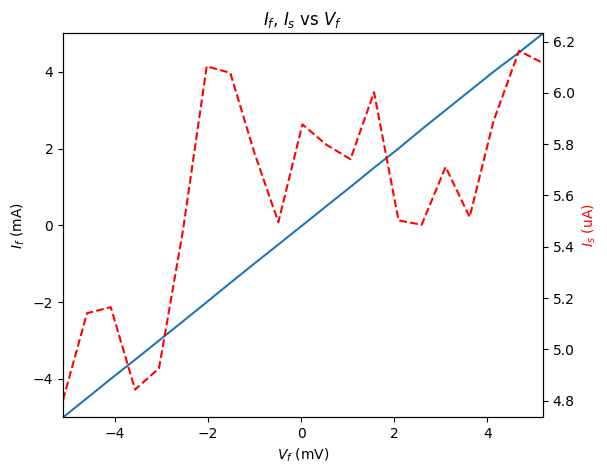

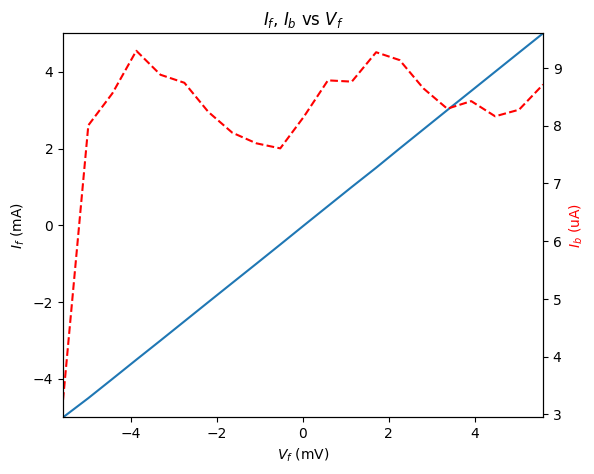

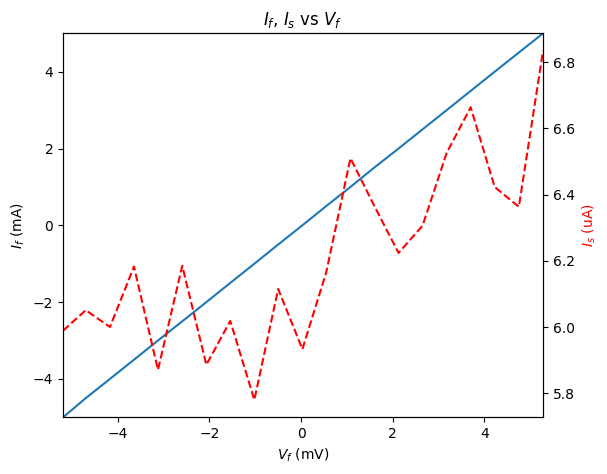

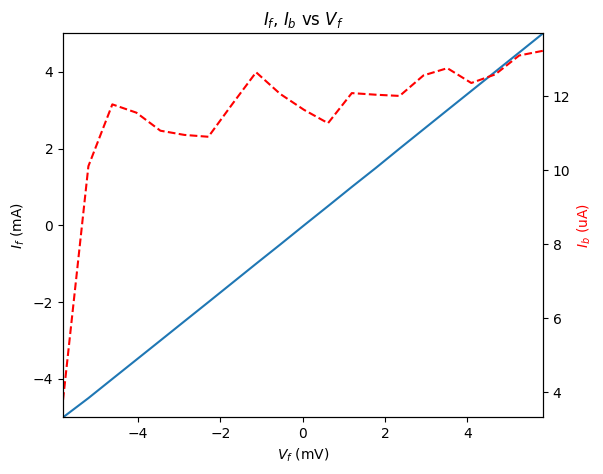

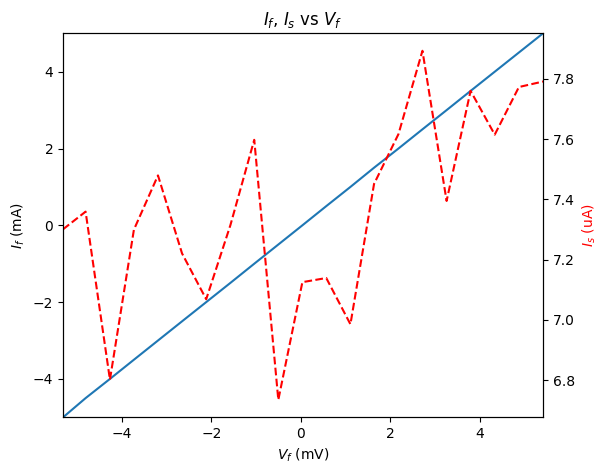

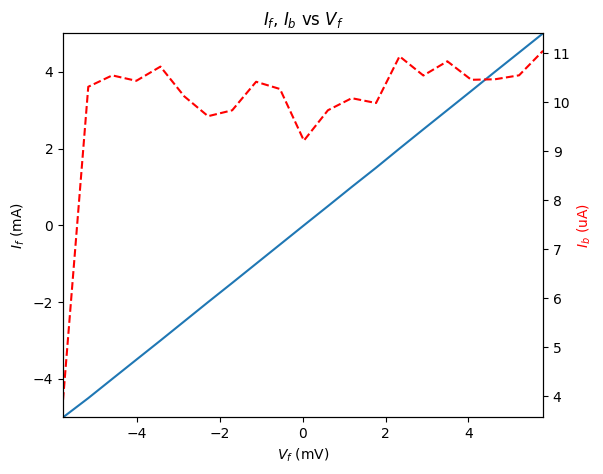

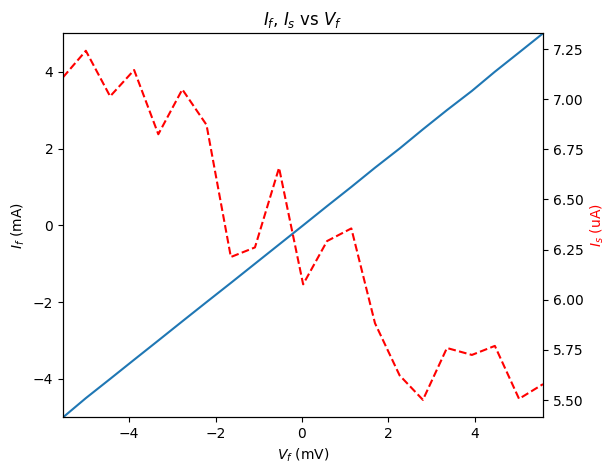

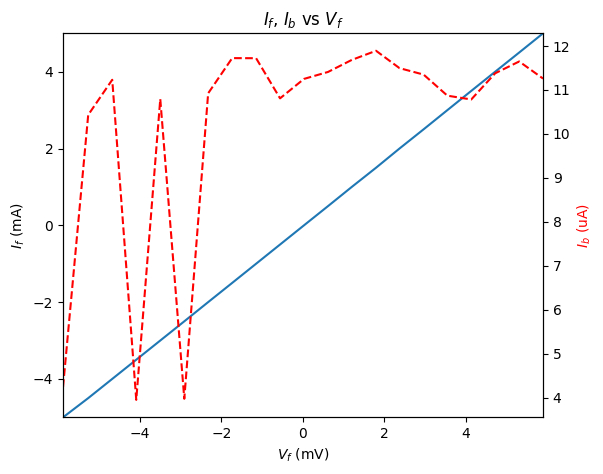

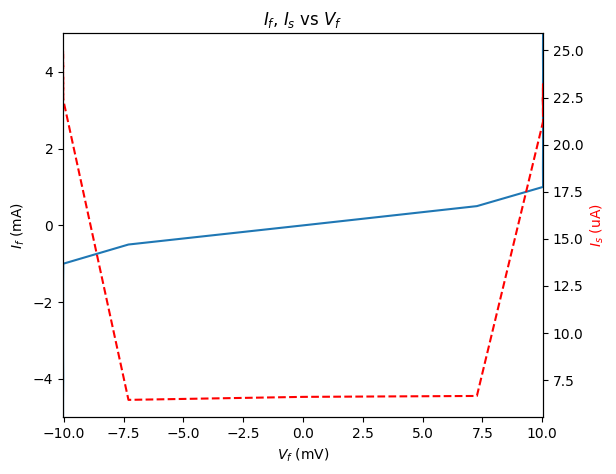

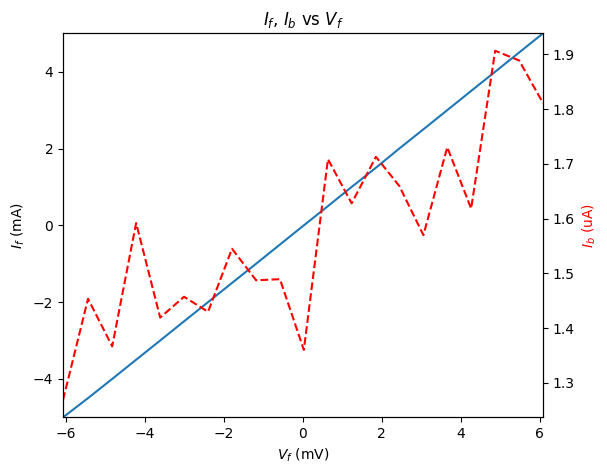

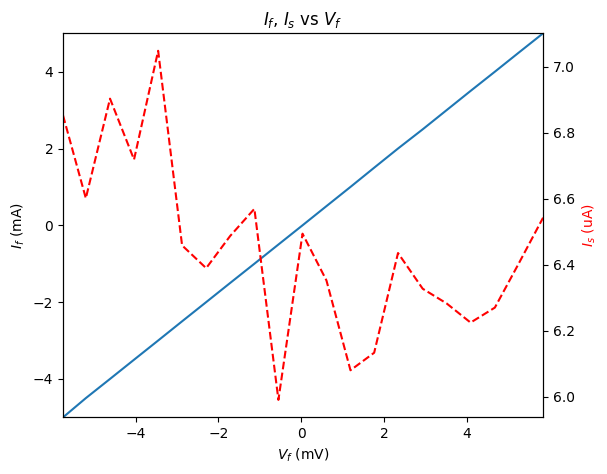

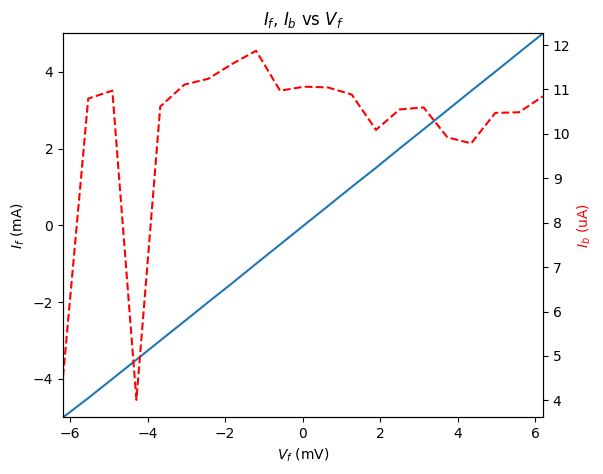

In [4]:
HP.SetIntTime("MED")
HP.SetHoldTime(0.01)
for i in range(1, 7):
    INO.opench(i)
    HP.SetCrossTest('SMU2', -5e-3, 5e-3, 50e-5)
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}ch{i}2 - {HP.term} {now}.csv"
    
    HP.SingleSave(plotp, timeout)
    Plot(plotp, "Vf", ["If", "Is"])
    
    HP.SetCrossTest('SMU3', -5e-3, 5e-3, 50e-5)
    now=datetime.datetime.now().strftime("%y%m%d %H%M%S")
    
    plotp=f"{path}ch{i}3 - {HP.term} {now}.csv"
    
    HP.SingleSave(plotp, timeout)
    Plot(plotp, "Vf", ["If", "Ib"])